In [2]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from math import sqrt

%matplotlib inline

In [3]:
df = pd.read_csv('BLSvmDataO.txt', encoding='latin1',sep=';') #encoding='latin1'

/home/dmitry/miniconda3/envs/opencv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (3,9,23,24,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df

,SampleID,ObjectID,Type_real,CArea,CFFact,CPolar,NArea,NFFact,NPolar,NCCave,...,ODBCN,C1,C2,C3,N1,N2,N3,GrRODR,GrRODG,GrRODB
0,0025D85892CD428C959999547681C5B7,1,112,127.38,75.489913,0.618741,101.34,37.871124,0.654726,0.297711,...,0.745806,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
1,0025D85892CD428C959999547681C5B7,2,5,114.74,17.521339,0.063441,49.04,65.407981,0.346063,0.574429,...,0.473911,NaN,NaN,NaN,NaN,NaN,NaN,0.699770,0.820007,0.731992
2,0025D85892CD428C959999547681C5B7,4,5,101.17,16.496993,0.132766,43.35,56.366346,0.436284,0.475202,...,0.554340,NaN,NaN,NaN,NaN,NaN,NaN,0.572022,0.662381,0.648231
3,0025D85892CD428C959999547681C5B7,5,5,126.88,18.547015,0.125241,45.75,71.862842,0.377898,0.439126,...,0.430096,NaN,NaN,NaN,NaN,NaN,NaN,0.611531,0.727182,0.633221
4,0025D85892CD428C959999547681C5B7,7,8,83.93,14.550742,0.144894,57.77,17.414287,0.060139,0.044487,...,0.525311,NaN,NaN,NaN,NaN,NaN,NaN,0.683844,0.758749,0.747957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85028,FDC732A590DB4C0BB9924F95B3AAFC9E,293,112,198.91,31.800644,0.366322,55.51,183.152654,0.507870,2.675194,...,0.729260,NaN,NaN,NaN,NaN,NaN,NaN,0.870763,1.018665,0.955615
85029,FDC732A590DB4C0BB9924F95B3AAFC9E,295,112,223.58,31.679139,0.438070,201.53,42.316790,0.389391,0.161812,...,0.369099,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
85030,FDC732A590DB4C0BB9924F95B3AAFC9E,296,8,123.6,20.642885,0.298138,70.85,17.348681,0.428012,0.037262,...,0.435735,NaN,NaN,NaN,NaN,NaN,NaN,0.756138,0.872466,1.113871
85031,FDC732A590DB4C0BB9924F95B3AAFC9E,298,8,150.91,20.175666,0.160589,89.86,27.396874,0.310961,0.172045,...,0.349196,NaN,NaN,NaN,NaN,NaN,NaN,0.864416,0.871172,0.955090


# Шаг 1. Предобработка данных

Ищем пропущенные значения

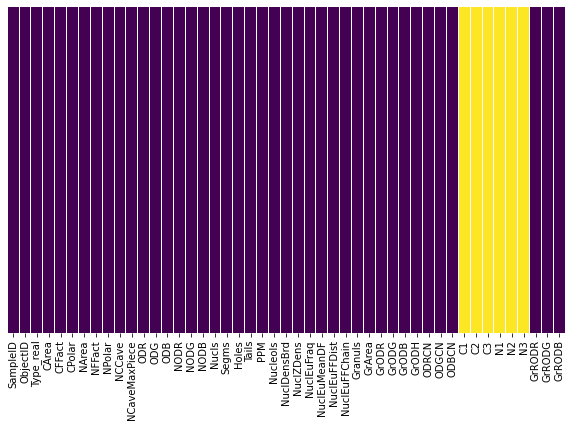

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
#удаляем лишние столбцы
df1= df.drop(columns=["ObjectID","C1", "C2", "C3", "N1", "N2", "N3","SampleID"])

In [7]:
df1.isna().sum()

Type_real        0
CArea            0
CFFact           0
CPolar           0
NArea            0
NFFact           0
NPolar           0
NCCave           0
NCaveMaxPiece    0
ODR              0
ODG              0
ODB              0
NODR             0
NODG             0
NODB             0
Nucls            0
Segms            0
Holes            0
Tails            0
PPM              0
Nucleols         0
NuclDensBrd      0
NuclZDens        0
NuclEuFraq       0
NuclEuMeanDF     0
NuclEuFFDist     0
NuclEuFFChain    0
Granuls          0
GrArea           0
GrODR            0
GrODG            0
GrODB            0
GrODH            0
ODRCN            1
ODGCN            1
ODBCN            1
GrRODR           3
GrRODG           3
GrRODB           3
dtype: int64

Удаляем пропущенные значения

In [8]:
df1=df1.dropna()

Смотрим строки-дубликаты

In [9]:
print(df1.duplicated().sum())

4


In [10]:
df1[df1.duplicated(keep=False)]

,Type_real,CArea,CFFact,CPolar,NArea,NFFact,NPolar,NCCave,NCaveMaxPiece,ODR,...,GrODR,GrODG,GrODB,GrODH,ODRCN,ODGCN,ODBCN,GrRODR,GrRODG,GrRODB
1274,111,302.2240251681,36.481217,0.532789,134.1778578072,45.250091,0.800200,0.542215,0.831337,0.286841,...,0.286841,0.405156,0.081213,57,0.409796,0.262588,0.395699,1.000000,1.000000,1.000000
1276,111,302.2240251681,36.481217,0.532789,134.1778578072,45.250091,0.800200,0.542215,0.831337,0.286841,...,0.286841,0.405156,0.081213,57,0.409796,0.262588,0.395699,1.000000,1.000000,1.000000
2162,111,383.9507526722,43.669022,0.547266,226.644466505,66.503967,0.577706,0.793619,0.845227,0.198235,...,0.198235,0.435608,0.079450,71,0.308003,0.319003,0.421684,1.000000,1.000000,1.000000
2163,111,383.9507526722,43.669022,0.547266,226.644466505,66.503967,0.577706,0.793619,0.845227,0.198235,...,0.198235,0.435608,0.079450,71,0.308003,0.319003,0.421684,1.000000,1.000000,1.000000
2238,111,294.3810856122,30.814021,0.612674,183.8262559567,49.516336,0.723509,0.361051,0.888219,0.169192,...,0.169192,0.359142,0.062754,70,0.309344,0.295700,0.409775,1.000000,1.000000,1.000000
2241,111,294.3810856122,30.814021,0.612674,183.8262559567,49.516336,0.723509,0.361051,0.888219,0.169192,...,0.169192,0.359142,0.062754,70,0.309344,0.295700,0.409775,1.000000,1.000000,1.000000
72495,5,145.812729,24.760034,0.214399,62.3666785104,46.842310,0.408095,0.420317,0.862534,0.263026,...,0.180219,0.617850,-0.009703,73,0.204139,0.163069,0.284104,1.459477,0.680548,-8.292635
72496,5,145.812729,24.760034,0.214399,62.3666785104,46.842310,0.408095,0.420317,0.862534,0.263026,...,0.180219,0.617850,-0.009703,73,0.204139,0.163069,0.284104,1.459477,0.680548,-8.292635


Удаляем дупликаты

In [11]:
df1.drop_duplicates(inplace = True)
df1.reset_index(drop=True,inplace = True)

Смотрим уникальные значения

In [12]:
df1.nunique()

Type_real           28
CArea            32998
CFFact           84435
CPolar           85025
NArea            18270
NFFact           83811
NPolar           85025
NCCave           81060
NCaveMaxPiece    54486
ODR              85024
ODG              85025
ODB              85025
NODR             85024
NODG             85024
NODB             85025
Nucls               17
Segms               36
Holes                5
Tails               30
PPM                151
Nucleols             3
NuclDensBrd      77995
NuclZDens        75099
NuclEuFraq       66530
NuclEuMeanDF     60757
NuclEuFFDist     63053
NuclEuFFChain    84449
Granuls            131
GrArea            6072
GrODR            84902
GrODG            84872
GrODB            84883
GrODH              176
ODRCN            85025
ODGCN            85025
ODBCN            85025
GrRODR           84951
GrRODG           84967
GrRODB           84838
dtype: int64

Смотрим на типы данных в колонках

In [13]:
df1.dtypes

Type_real          int64
CArea             object
CFFact           float64
CPolar           float64
NArea             object
NFFact           float64
NPolar           float64
NCCave            object
NCaveMaxPiece    float64
ODR              float64
ODG              float64
ODB              float64
NODR             float64
NODG             float64
NODB             float64
Nucls              int64
Segms              int64
Holes              int64
Tails              int64
PPM              float64
Nucleols           int64
NuclDensBrd       object
NuclZDens         object
NuclEuFraq       float64
NuclEuMeanDF     float64
NuclEuFFDist     float64
NuclEuFFChain    float64
Granuls            int64
GrArea            object
GrODR            float64
GrODG            float64
GrODB            float64
GrODH              int64
ODRCN            float64
ODGCN            float64
ODBCN            float64
GrRODR           float64
GrRODG           float64
GrRODB           float64
dtype: object

In [14]:
df1

,Type_real,CArea,CFFact,CPolar,NArea,NFFact,NPolar,NCCave,NCaveMaxPiece,ODR,...,GrODR,GrODG,GrODB,GrODH,ODRCN,ODGCN,ODBCN,GrRODR,GrRODG,GrRODB
0,112,127.38,75.489913,0.618741,101.34,37.871124,0.654726,0.297711,0.379848,0.125119,...,0.125119,0.385923,0.203939,97,0.760631,0.652555,0.745806,1.000000,1.000000,1.000000
1,5,114.74,17.521339,0.063441,49.04,65.407981,0.346063,0.574429,0.908058,0.160104,...,0.228795,0.505662,0.304763,96,0.224305,0.302718,0.473911,0.699770,0.820007,0.731992
2,5,101.17,16.496993,0.132766,43.35,56.366346,0.436284,0.475202,0.674272,0.249376,...,0.435955,0.743963,0.409603,82,0.319880,0.368712,0.554340,0.572022,0.662381,0.648231
3,5,126.88,18.547015,0.125241,45.75,71.862842,0.377898,0.439126,0.859632,0.155737,...,0.254668,0.528118,0.334885,97,0.207741,0.279848,0.430096,0.611531,0.727182,0.633221
4,8,83.93,14.550742,0.144894,57.77,17.414287,0.060139,0.044487,0.167315,0.455981,...,0.666791,0.678645,0.315946,44,0.669039,0.413368,0.525311,0.683844,0.758749,0.747957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85021,112,198.91,31.800644,0.366322,55.51,183.152654,0.507870,2.675194,0.696835,0.423169,...,0.485975,1.024771,0.263469,73,0.602358,0.620257,0.729260,0.870763,1.018665,0.955615
85022,112,223.58,31.679139,0.438070,201.53,42.316790,0.389391,0.161812,0.201779,0.173313,...,0.173313,0.350057,0.110163,75,0.314529,0.267282,0.369099,1.000000,1.000000,1.000000
85023,8,123.6,20.642885,0.298138,70.85,17.348681,0.428012,0.037262,0.287879,0.300502,...,0.397417,0.558133,0.145726,59,0.358389,0.280087,0.435735,0.756138,0.872466,1.113871
85024,8,150.91,20.175666,0.160589,89.86,27.396874,0.310961,0.172045,0.838939,0.306414,...,0.354475,0.523333,0.136693,61,0.376443,0.261945,0.349196,0.864416,0.871172,0.955090


числовые данные - желтые

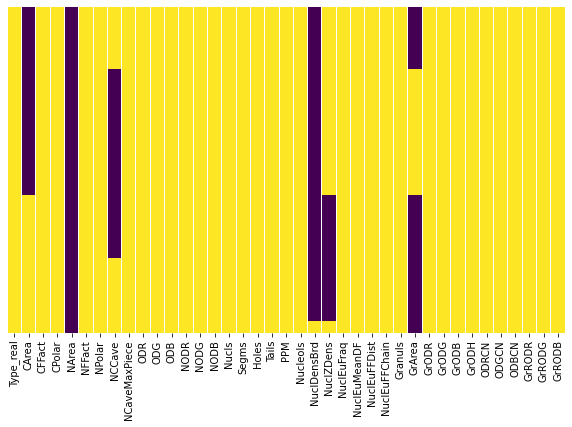

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
sns_heatmap = sns.heatmap(df1.applymap(np.isreal), yticklabels=False, cbar=False, cmap='viridis')

Конвертируем все колонки в float()

In [16]:
df2=df1.select_dtypes(exclude=[np.number])

In [17]:
strange_rows=[]
for i in df2.index:
    for element in df2.columns:
        try:
            b=float(df2.loc[i, element])
        except:
            if i in strange_rows:
                break
            else:
                strange_rows.append(i)
                

In [18]:
df2[df2.index.isin(strange_rows)]

,CArea,NArea,NCCave,NuclDensBrd,NuclZDens,GrArea
18,105.73,60.44,0.023329,1.3564155102,1.236253,02.¬ ©
35,182.69,97.7,0.110645,1.3507261276,1.377715,ä¥¢.75
57,122.09,48.92,0.383483,1.3618090153,1.051926,01.¬ ©
99,267.57,60.64,0.480211,1.7316482067,1.222103,12.¬ ©
109,99.22,27.¬ ©,0.029818,1.7706334591,1.413148,0.5600000024
...,...,...,...,...,...,...
84723,90.79,27.¬ ©,0.032,1.091734,0.72623,0
84847,187.02,54.65,0.626167,1.10011,0.776953,05.¬ ©
84859,152.44,85.32,0.033638,0.799722,0.809458,02.¬ ©
84925,169.68,84.95,0.042378,0.829306,0.837123,01.¬ ©


Удаляем странные значения

In [19]:
df1.drop(index=strange_rows,inplace=True)

Конвертируем все данные во float

In [20]:
for element in df1.columns[1:]:
    df1[element]=df1[element].astype('float')

Проверяем типы переменных

In [21]:
df1.dtypes

Type_real          int64
CArea            float64
CFFact           float64
CPolar           float64
NArea            float64
NFFact           float64
NPolar           float64
NCCave           float64
NCaveMaxPiece    float64
ODR              float64
ODG              float64
ODB              float64
NODR             float64
NODG             float64
NODB             float64
Nucls            float64
Segms            float64
Holes            float64
Tails            float64
PPM              float64
Nucleols         float64
NuclDensBrd      float64
NuclZDens        float64
NuclEuFraq       float64
NuclEuMeanDF     float64
NuclEuFFDist     float64
NuclEuFFChain    float64
Granuls          float64
GrArea           float64
GrODR            float64
GrODG            float64
GrODB            float64
GrODH            float64
ODRCN            float64
ODGCN            float64
ODBCN            float64
GrRODR           float64
GrRODG           float64
GrRODB           float64
dtype: object

# Шаг 2. Поиск выбросов

Создаем объясняемую переменную

In [22]:
classes={1:'моноциты',2:'бласты',3:'лимфоциты'}

In [23]:
df

,SampleID,ObjectID,Type_real,CArea,CFFact,CPolar,NArea,NFFact,NPolar,NCCave,...,ODBCN,C1,C2,C3,N1,N2,N3,GrRODR,GrRODG,GrRODB
0,0025D85892CD428C959999547681C5B7,1,112,127.38,75.489913,0.618741,101.34,37.871124,0.654726,0.297711,...,0.745806,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
1,0025D85892CD428C959999547681C5B7,2,5,114.74,17.521339,0.063441,49.04,65.407981,0.346063,0.574429,...,0.473911,NaN,NaN,NaN,NaN,NaN,NaN,0.699770,0.820007,0.731992
2,0025D85892CD428C959999547681C5B7,4,5,101.17,16.496993,0.132766,43.35,56.366346,0.436284,0.475202,...,0.554340,NaN,NaN,NaN,NaN,NaN,NaN,0.572022,0.662381,0.648231
3,0025D85892CD428C959999547681C5B7,5,5,126.88,18.547015,0.125241,45.75,71.862842,0.377898,0.439126,...,0.430096,NaN,NaN,NaN,NaN,NaN,NaN,0.611531,0.727182,0.633221
4,0025D85892CD428C959999547681C5B7,7,8,83.93,14.550742,0.144894,57.77,17.414287,0.060139,0.044487,...,0.525311,NaN,NaN,NaN,NaN,NaN,NaN,0.683844,0.758749,0.747957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85028,FDC732A590DB4C0BB9924F95B3AAFC9E,293,112,198.91,31.800644,0.366322,55.51,183.152654,0.507870,2.675194,...,0.729260,NaN,NaN,NaN,NaN,NaN,NaN,0.870763,1.018665,0.955615
85029,FDC732A590DB4C0BB9924F95B3AAFC9E,295,112,223.58,31.679139,0.438070,201.53,42.316790,0.389391,0.161812,...,0.369099,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
85030,FDC732A590DB4C0BB9924F95B3AAFC9E,296,8,123.6,20.642885,0.298138,70.85,17.348681,0.428012,0.037262,...,0.435735,NaN,NaN,NaN,NaN,NaN,NaN,0.756138,0.872466,1.113871
85031,FDC732A590DB4C0BB9924F95B3AAFC9E,298,8,150.91,20.175666,0.160589,89.86,27.396874,0.310961,0.172045,...,0.349196,NaN,NaN,NaN,NaN,NaN,NaN,0.864416,0.871172,0.955090


In [24]:
df1=df1[df1['Type_real'].isin([9,12,13,8,28,29])]
df1['Type_real'].replace(9,1,inplace=True)
df1['Type_real'].replace([12,13],2,inplace=True)
df1['Type_real'].replace([8,28,29],3,inplace=True)

/home/dmitry/miniconda3/envs/opencv/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Строим гистрограммы и смотрим выбросы

In [25]:
df1['Type_real'].unique()

array([3, 1, 2])

/home/dmitry/miniconda3/envs/opencv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


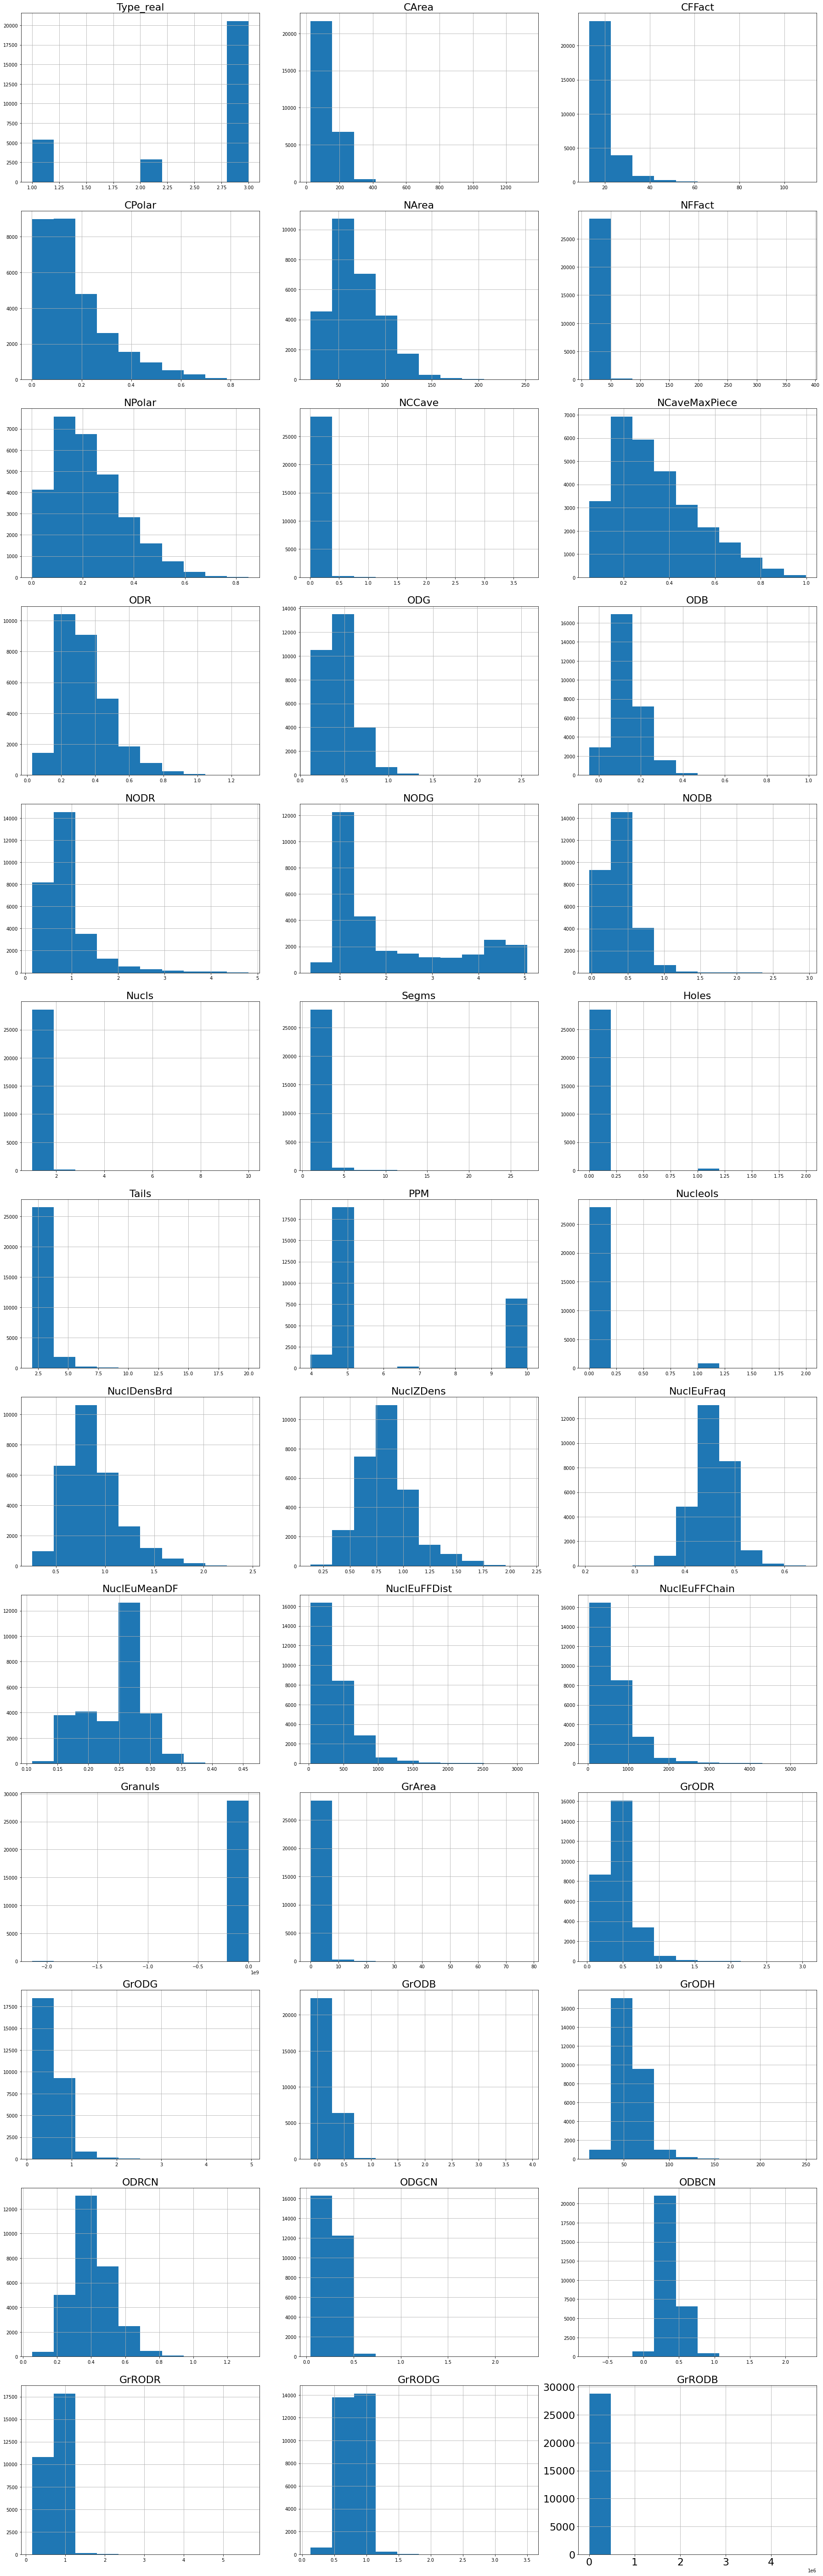

In [26]:
N=df1.shape[1]
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
fig, ax = plt.subplots(figsize=(25,N*2))
df1.iloc[:,:N].hist(ax=ax, layout=(int(N/3),3))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='x', length=5, direction='out')
fig.tight_layout()
plt.show()

Выведим  выбросы с помощью изоляционного леса

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.01),max_features=1.0)
outliers_index=[]
for y in df1['Type_real'].unique():
    print(y)
    df_out=df1.loc[df1['Type_real']==y].copy()
    for column_name in df1.columns[1:]:
        model.fit(df_out[[column_name]])
        df_out.loc[:,'anomaly']=model.predict(df_out[[column_name]])
        outliers_index=outliers_index+df_out.loc[df_out['anomaly']==-1].index.tolist()
x = np.array(outliers_index) 

3
1
2


In [28]:
len(np.unique(x))

5339

In [29]:
df1['Type_real'].unique()

array([3, 1, 2])

In [30]:
df1.drop(index=x)['Type_real'].unique()

array([3, 1, 2])

Удаляем выбросы и смотрим на новые гистограммы распределений

/home/dmitry/miniconda3/envs/opencv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


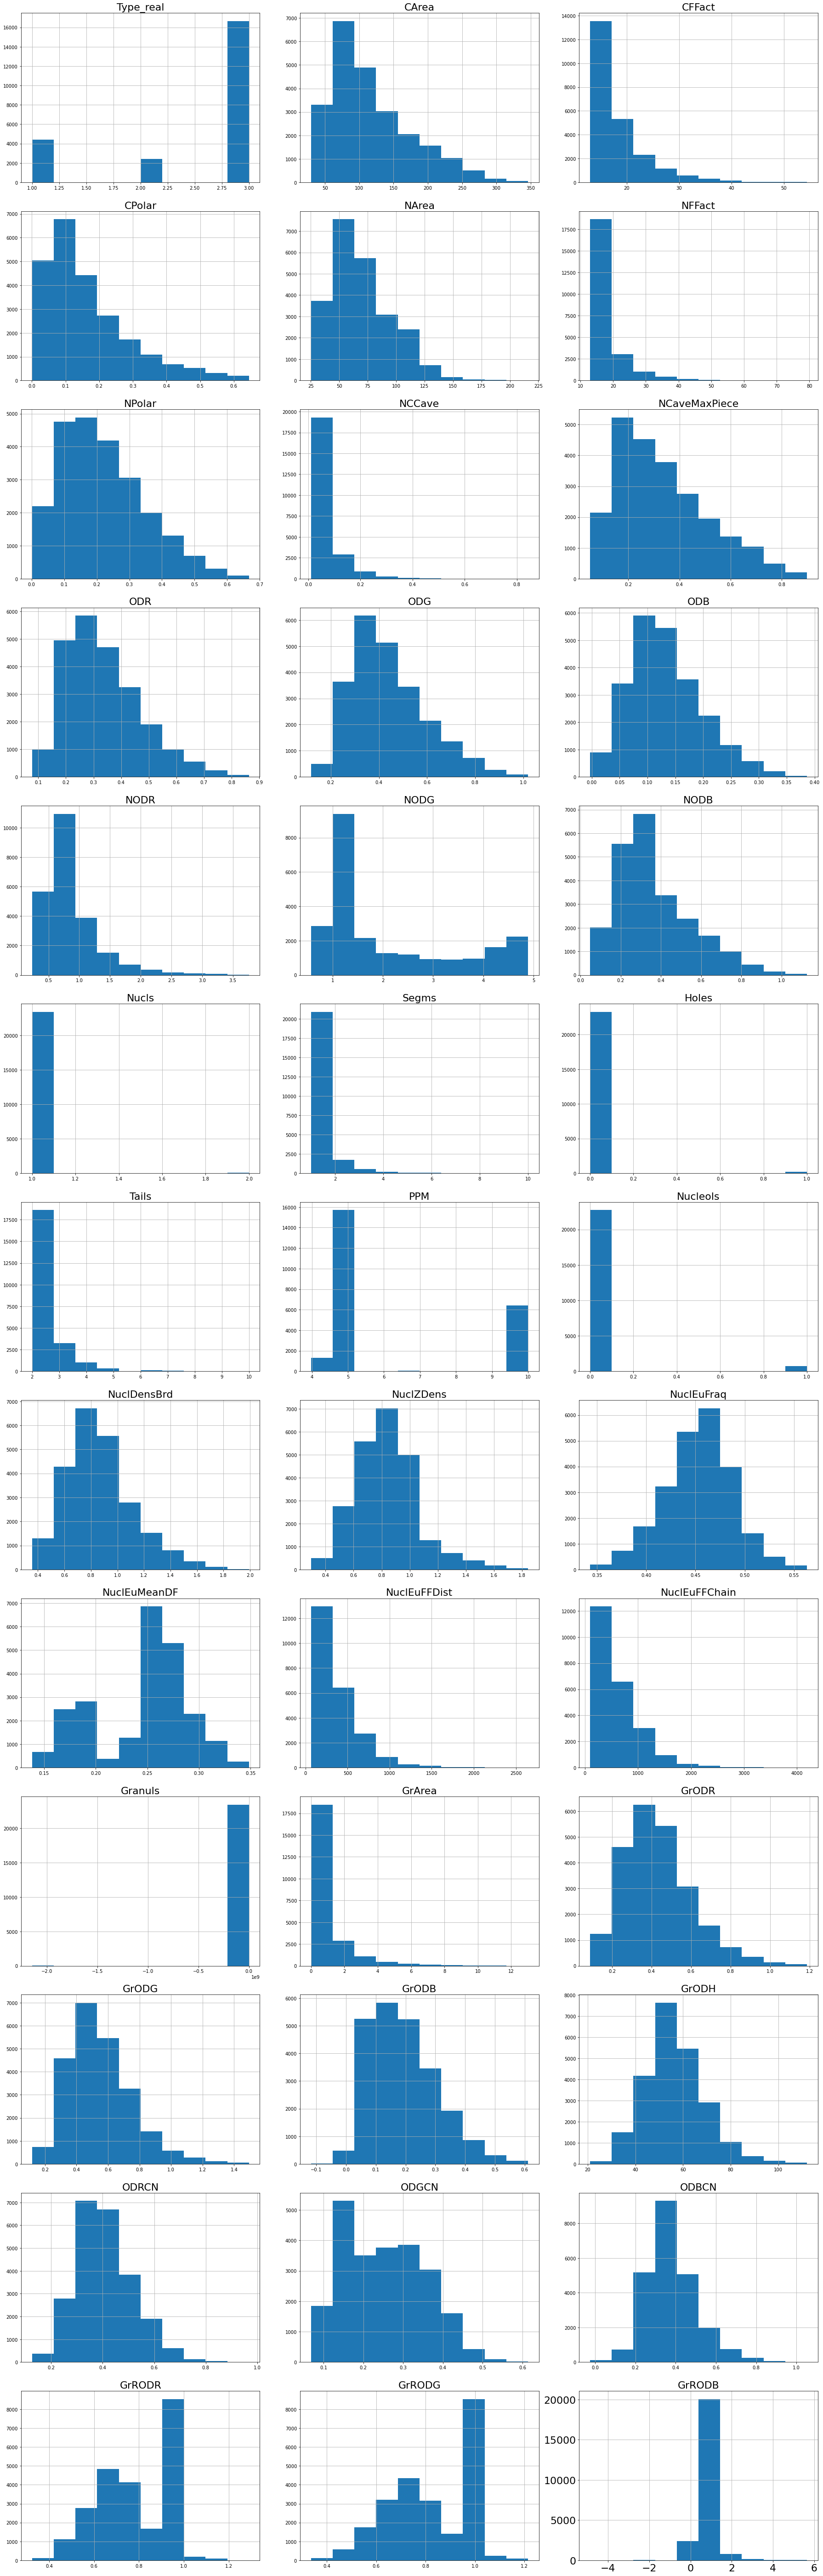

In [31]:
df2=df1.drop(index=x)
N=df2.shape[1]
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
fig, ax = plt.subplots(figsize=(25,N*2))
df2.iloc[:,:N].hist(ax=ax, layout=(int(N/3),3))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
ax.tick_params(axis='x', length=5, direction='out')
fig.tight_layout()
plt.show()

In [32]:
df2.nunique()

Type_real            3
CArea            11087
CFFact           23317
CPolar           23472
NArea             7989
NFFact           22803
NPolar           23472
NCCave           21168
NCaveMaxPiece    10379
ODR              23472
ODG              23472
ODB              23472
NODR             23471
NODG             23472
NODB             23472
Nucls                2
Segms               10
Holes                2
Tails                9
PPM                104
Nucleols             2
NuclDensBrd      22763
NuclZDens        22596
NuclEuFraq       21440
NuclEuMeanDF     20645
NuclEuFFDist     21330
NuclEuFFChain    23437
Granuls             54
GrArea            1646
GrODR            23458
GrODG            23460
GrODB            23457
GrODH               91
ODRCN            23472
ODGCN            23472
ODBCN            23472
GrRODR           23450
GrRODG           23463
GrRODB           23430
dtype: int64

# Шаг 3. Построение модели

Шкалирование данных

In [33]:
df2

,Type_real,CArea,CFFact,CPolar,NArea,NFFact,NPolar,NCCave,NCaveMaxPiece,ODR,...,GrODR,GrODG,GrODB,GrODH,ODRCN,ODGCN,ODBCN,GrRODR,GrRODG,GrRODB
4,3,83.93,14.550742,0.144894,57.77,17.414287,0.060139,0.044487,0.167315,0.455981,...,0.666791,0.678645,0.315946,44.0,0.669039,0.413368,0.525311,0.683844,0.758749,0.747957
6,1,171.95,21.500572,0.149194,95.81,31.218176,0.279502,0.117002,0.220339,0.235026,...,0.353409,0.516725,0.277532,72.0,0.518693,0.358223,0.438260,0.665027,0.713566,0.613570
11,3,74.67,15.713081,0.063055,70.30,15.882751,0.068971,0.040825,0.212544,0.194184,...,0.194184,0.257400,0.139380,65.0,0.279931,0.218177,0.317217,1.000000,1.000000,1.000000
13,3,101.16,16.806894,0.059025,62.32,14.399597,0.025037,0.028883,0.111111,0.254218,...,0.412466,0.490809,0.291633,59.0,0.472650,0.284054,0.397844,0.616336,0.688867,0.581991
25,3,107.01,15.933274,0.097108,66.60,14.929015,0.159260,0.024625,0.121951,0.250583,...,0.349085,0.442180,0.249675,63.0,0.501794,0.281255,0.356029,0.717829,0.743569,0.608958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85016,3,103.24,16.578104,0.187489,70.57,18.027194,0.427220,0.050446,0.446629,0.349505,...,0.385662,0.567869,0.155642,61.0,0.386712,0.304353,0.442931,0.906248,1.004931,1.130383
85018,3,93.23,17.855822,0.067238,67.15,21.140831,0.087584,0.089054,0.359532,0.366467,...,0.497485,0.787050,0.199051,63.0,0.413320,0.353104,0.539274,0.736639,0.802407,1.058907
85019,3,107.95,15.803540,0.112601,75.67,17.388229,0.204987,0.040174,0.187500,0.372005,...,0.488561,0.880104,0.213667,68.0,0.449574,0.369643,0.499409,0.761431,0.713831,0.862120
85020,3,91.94,15.191297,0.166613,73.48,17.295434,0.122506,0.052123,0.297650,0.451020,...,0.451020,0.633740,0.177421,59.0,0.494637,0.348795,0.473342,1.000000,1.000000,1.000000


In [34]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(df2.drop(columns=['Type_real']))

In [35]:
df3=pd.DataFrame(X_scaled,columns=df2.drop(columns=['Type_real']).columns,index=df2.index)
df3['Type_real']=df2['Type_real']

In [36]:
df3

,CArea,CFFact,CPolar,NArea,NFFact,NPolar,NCCave,NCaveMaxPiece,ODR,ODG,...,GrODG,GrODB,GrODH,ODRCN,ODGCN,ODBCN,GrRODR,GrRODG,GrRODB,Type_real
4,-0.575996,-0.722648,-0.159165,-0.463296,-0.064925,-1.252610,-0.324594,-0.963931,0.889480,0.483715,...,0.640795,1.118820,-1.020719,2.378508,1.585093,1.166904,-0.637032,-0.386728,-0.151903,3
6,0.937352,0.603084,-0.124982,0.991503,2.434790,0.472393,0.931563,-0.662437,-0.752538,-0.460759,...,-0.162588,0.773193,1.239873,1.006178,1.036725,0.475823,-0.742709,-0.656851,-0.457538,1
11,-0.735205,-0.500923,-0.809731,0.015900,-0.342268,-1.183156,-0.388024,-0.706762,-1.056056,-1.179873,...,-1.449257,-0.469849,0.674725,-1.173206,-0.355921,-0.485129,1.138491,1.055599,0.421320,3
13,-0.279756,-0.292270,-0.841762,-0.289287,-0.610849,-1.528637,-0.594888,-1.283509,-0.609919,-0.658533,...,-0.291170,0.900068,0.190312,0.585907,0.299177,0.154962,-1.016157,-0.804518,-0.529361,3
25,-0.179176,-0.458920,-0.539031,-0.125602,-0.514978,-0.473152,-0.668657,-1.221872,-0.636927,-0.718682,...,-0.532450,0.522547,0.513254,0.851926,0.271343,-0.177002,-0.446173,-0.477479,-0.468029,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85016,-0.243994,-0.335913,0.179437,0.026226,0.046064,1.634005,-0.221358,0.624255,0.098208,0.843849,...,0.091169,-0.323525,0.351783,-0.198529,0.501030,0.512901,0.611981,1.085079,0.717852,3
85018,-0.416099,-0.092179,-0.776475,-0.104568,0.609906,-1.036791,0.447431,0.129017,0.224260,1.237043,...,1.178660,0.067053,0.513254,0.044352,0.985819,1.277763,-0.340538,-0.125713,0.555293,3
85019,-0.163014,-0.483667,-0.415871,0.221270,-0.069644,-0.113563,-0.399294,-0.849160,0.265414,1.215789,...,1.640354,0.198560,0.916931,0.375270,1.150284,0.961277,-0.201309,-0.655271,0.107739,3
85020,-0.438278,-0.600457,0.013486,0.137516,-0.086448,-0.762169,-0.192314,-0.222844,0.852610,1.251287,...,0.417995,-0.127565,0.190312,0.786593,0.942967,0.754329,1.138491,1.055599,0.421320,3


Разобиваем на три выборки

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop(columns=['Type_real']),df3['Type_real'], test_size=0.4,stratify=df3['Type_real'])

In [38]:
X_test['Type_real']=y_test
df4=X_test
X_test, X_valid, y_test, y_valid = train_test_split(df4.drop(columns=['Type_real']),df4['Type_real'], test_size=0.5,stratify=df4['Type_real'])

Подбираем поиском по сетке лучшие гиперпараметры

In [39]:
from sklearn import svm

In [40]:
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
gs = GridSearchCV(svm.SVC(),parameters,verbose=1, cv=3,n_jobs=-1,scoring='accuracy')
gs_results=gs.fit(X_valid,y_valid)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [41]:
gs_results.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Финальная точность

In [42]:
clf2 = svm.SVC(C=1000, gamma=0.001, kernel='rbf')
clf2.fit(X_train,y_train) 
scores=cross_val_score(clf2, X_test, y_test,scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.01)


In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels

In [44]:

target_names = target_names = list(classes.values())
print(classification_report(y_test, clf2.predict(X_test),target_names=target_names))


              precision    recall  f1-score   support

    моноциты       0.95      0.92      0.93       883
      бласты       0.91      0.82      0.86       482
   лимфоциты       0.97      0.98      0.98      3329

    accuracy                           0.96      4694
   macro avg       0.94      0.91      0.92      4694
weighted avg       0.96      0.96      0.96      4694



In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, clf2.predict(X_test))
print(cm)

[[ 815   16   52]
 [  21  396   65]
 [  26   25 3278]]


In [48]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [62]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True ,
                          savepath=None
                         ):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    
    
    
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=15)
    
    if savepath is not None:
        plt.tight_layout()
        plt.savefig(savepath, dpi=300)
    
    plt.show()

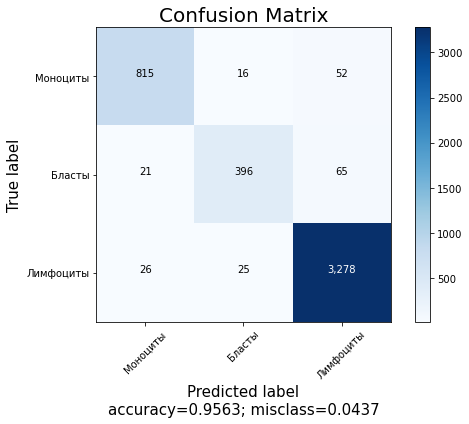

In [63]:
plot_confusion_matrix(cm           = np.array(cm), 
                      normalize    = False,
                      target_names = ['Моноциты', 'Бласты', 'Лимфоциты'],
                      title        = "Confusion Matrix", 
                      savepath='SVM_cm.png'
                     )

In [64]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)

Normalized confusion matrix
[[0.92298981 0.01812005 0.05889015]
 [0.04356846 0.82157676 0.13485477]
 [0.00781015 0.00750976 0.98468008]]


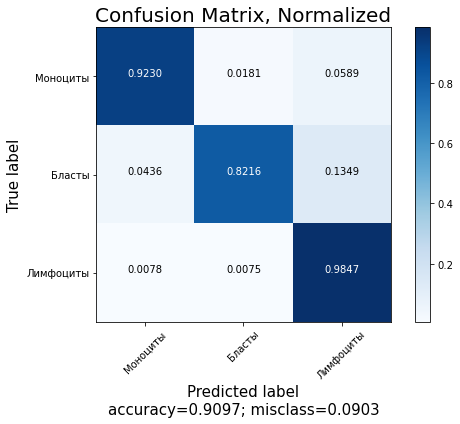

In [65]:
plot_confusion_matrix(cm           = np.array(cm_normalized), 
                      normalize    = True,
                      target_names = ['Моноциты', 'Бласты', 'Лимфоциты'],
                      title        = "Confusion Matrix, Normalized",
                      savepath='SVM_cm_norm.png'
                     )

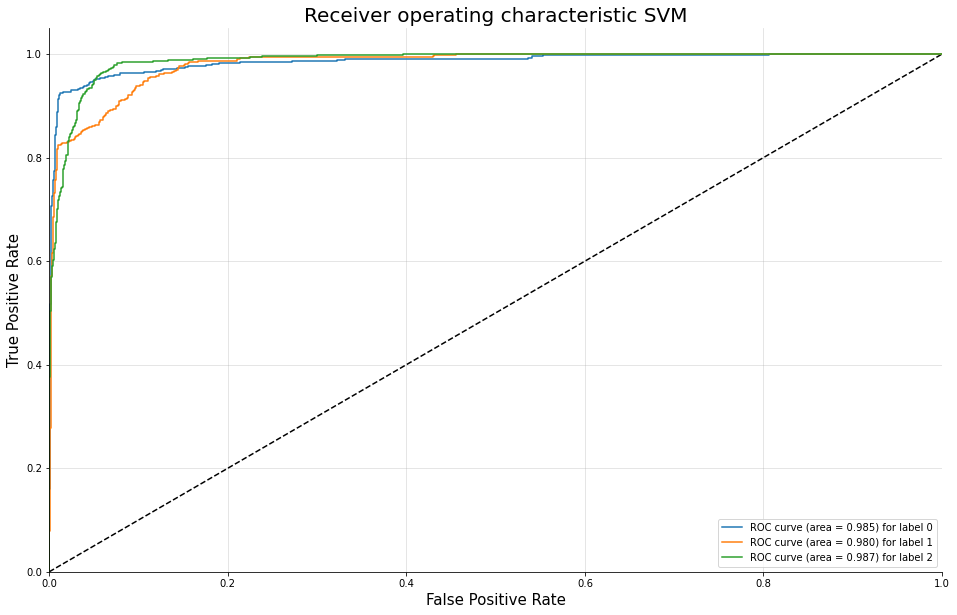

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

y_pred = clf2.predict(X_test)

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6), savepath=None):
    y_score = clf.decision_function(X_test)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=15)
    ax.set_ylabel('True Positive Rate', fontsize=15)
    ax.set_title('Receiver operating characteristic SVM', fontsize=20)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.3f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    
    if savepath is not None:
        plt.savefig(savepath, dpi=300)
    
    plt.show()

plot_multiclass_roc(clf2, X_test, y_test, n_classes=3, figsize=(16, 10), savepath='SVM_ROC_curve.png')

In [65]:



clf2 = svm.SVC(C=100, gamma=0.001, kernel='linear')
clf2.fit(X_train,y_train) 
clf2.coef_

array([[ 1.90497612e+00,  2.96849429e-01, -2.96185900e-01,
        -1.46153975e+00,  7.15877736e-01,  2.69263512e-01,
         3.16575242e-01, -1.98129201e-02,  1.47266720e+00,
         1.53709007e+00, -9.21526277e-01, -6.64287928e+00,
         9.27928320e+00, -2.60455322e+00, -7.64444664e-02,
        -2.92813414e-01,  1.28816642e-01,  3.90766868e-02,
        -7.47008522e-01, -4.52303076e-02,  6.34851865e-01,
        -1.01115549e-02,  1.79199709e-01,  4.42443612e-01,
         1.03952970e+00, -1.15830594e+00,  4.35521999e-04,
         5.36818012e-02,  3.73844311e-01, -2.12325312e+00,
         1.32808070e+00, -8.84358482e-01, -1.89662692e+00,
         7.87521598e-01, -1.03756078e+00,  1.51441615e+00,
        -2.21746887e+00,  2.77429106e-01],
       [ 1.48925435e+00, -3.64084678e-02, -7.19133724e-02,
         1.07908921e+00,  1.28280585e+00,  7.11631268e-03,
         2.90538964e-01,  2.91511678e-01,  2.21160067e-01,
         1.85008867e+00, -6.77663275e-01, -1.16287119e+00,
         5.27

In [64]:
coefs_array = []
for i in range(0, len(X_train), 1000):
    
    print('MOMOMOMOMOM')
    subset_train_X, subset_train_Y = X_train[i:i+1000], y_train[i:i+1000]
    clf2.fit(subset_train_X, subset_train_Y)
    
    coefs_array.append(
        clf2.coef_
    )
    
    #f_importances(clf2.coef_[0], subset_train_X.columns,classes[1])
    
    

MOMOMOMOMOM
MOMOMOMOMOM
MOMOMOMOMOM
MOMOMOMOMOM
MOMOMOMOMOM
MOMOMOMOMOM
MOMOMOMOMOM
MOMOMOMOMOM
MOMOMOMOMOM
MOMOMOMOMOM
MOMOMOMOMOM
MOMOMOMOMOM
MOMOMOMOMOM
MOMOMOMOMOM
MOMOMOMOMOM


In [103]:
from scipy.stats import spearmanr, mannwhitneyu
from scipy.stats import rankdata

from scipy.spatial.distance import jaccard

full_coef = clf2.coef_


real_subsets_p = []
shuffled_subsets_p = []

for c in coefs_array:
    
    abs_full = np.abs(full_coef[0])
    ranked_full = rankdata(abs_full)
    
    abs_c = np.abs(c[0])
    ranked_c = rankdata(abs_c)
    
    real_subsets_p.append(spearmanr(ranked_full, ranked_c)[1])
    np.random.shuffle(ranked_c)
    shuffled_subsets_p.append(spearmanr(ranked_full, ranked_c)[1])
    


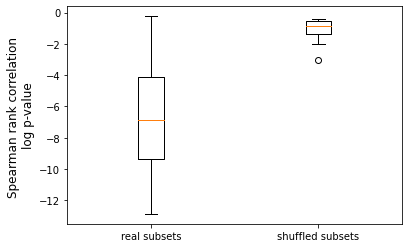

MannwhitneyuResult(statistic=16.0, pvalue=3.418406268000528e-05)


In [106]:

plt.boxplot(np.log([real_subsets_p, shuffled_subsets_p]).T)
plt.xticks([1,2], ['real subsets', 'shuffled subsets'], rotation=0)
plt.ylabel('Spearman rank correlation \nlog p-value', fontsize=12)
plt.show()

print(mannwhitneyu(real_subsets_p, shuffled_subsets_p))

Какие переменные лучше всего предсказывают

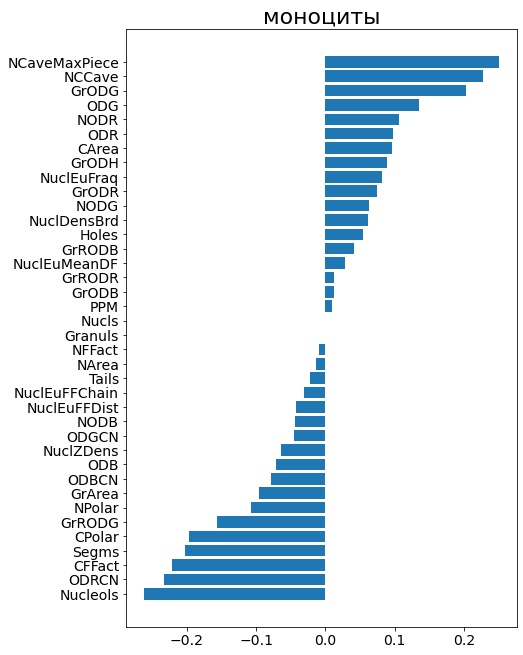

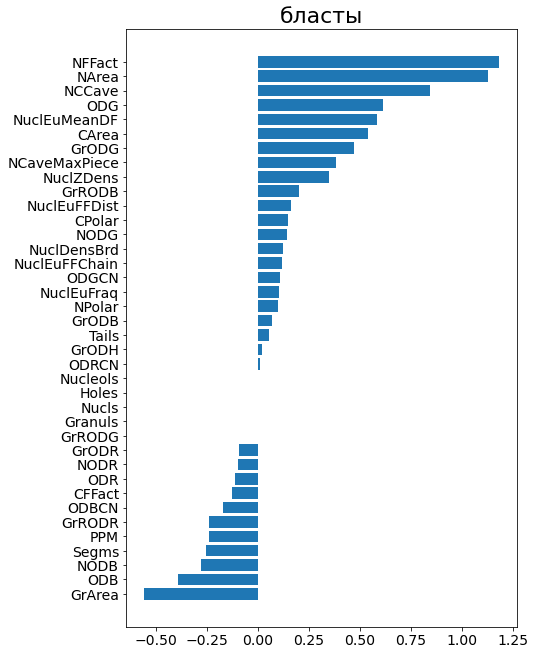

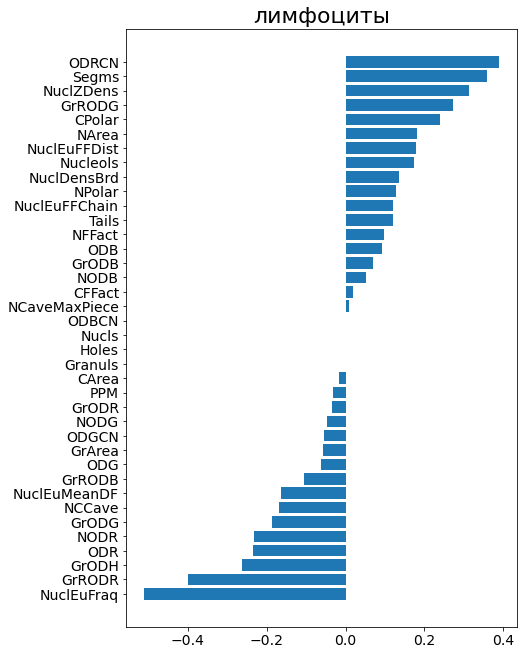

In [62]:
def f_importances(coef, names,label):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(7,11))
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title(label)
    plt.show()

f_importances(clf2.coef_[0], X_train.columns,classes[1])
f_importances(clf2.coef_[1], X_train.columns,classes[2])
f_importances(clf2.coef_[2], X_train.columns,classes[3])